# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. **Do not forget, this is a Classification problem!**

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Frederic Davidsen</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isna().sum().sum()

0

- The dataset has many outliers
- All features are continuous variable
- No missing value

# Exploratory Data Analysis

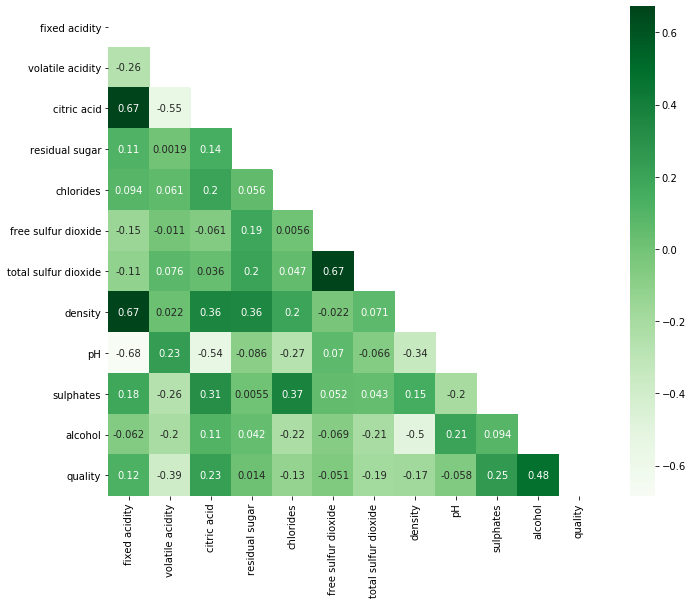

In [6]:
corr = data.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap='Greens', mask=mask, annot=True);

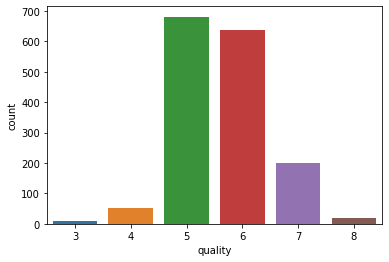

In [7]:
sns.countplot(x='quality', data=data);

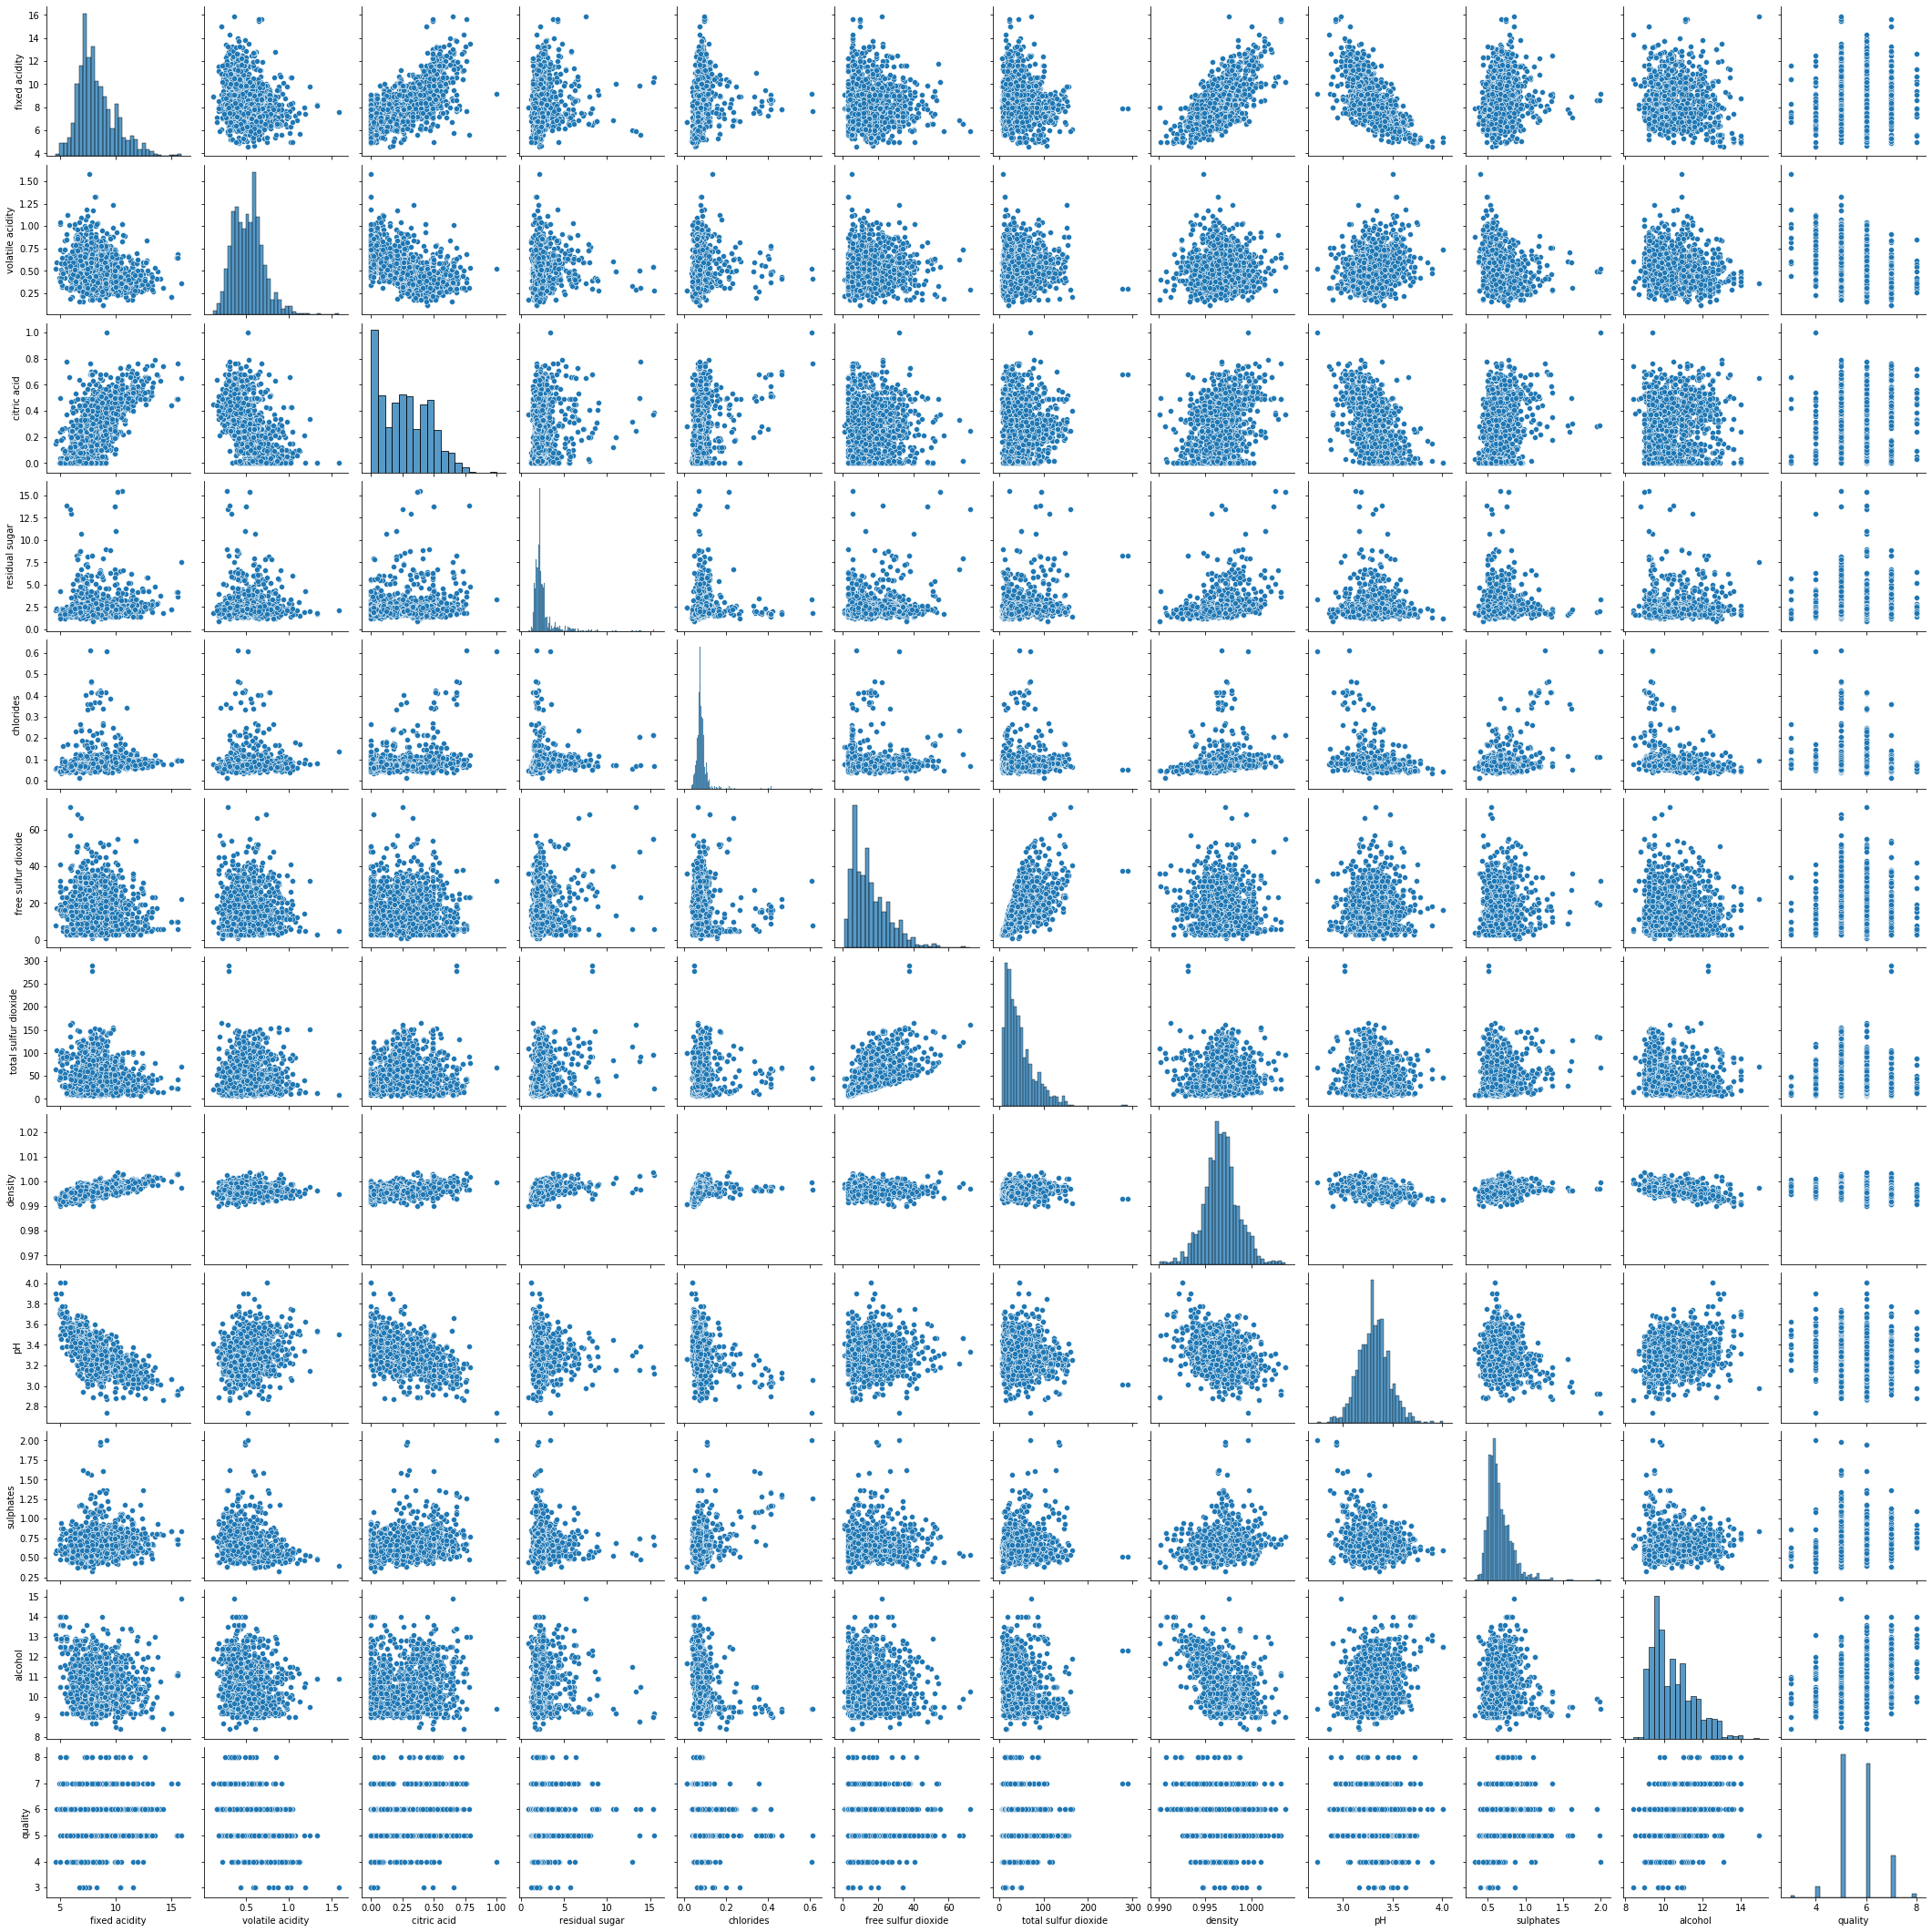

In [8]:
sns.pairplot(data);

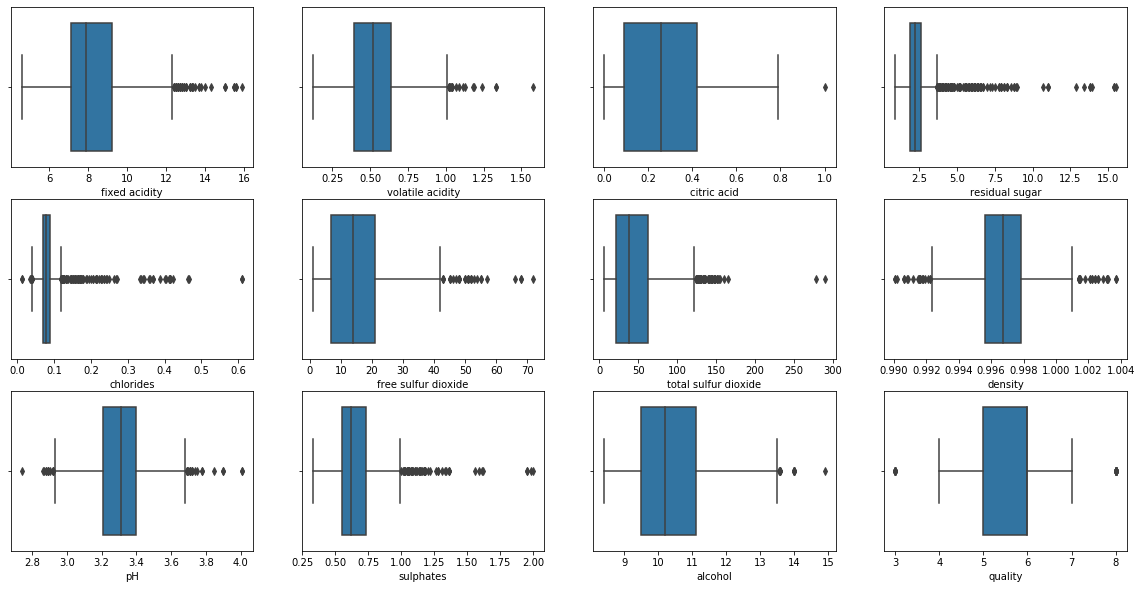

In [9]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data.iloc[:, i], ax=ax)

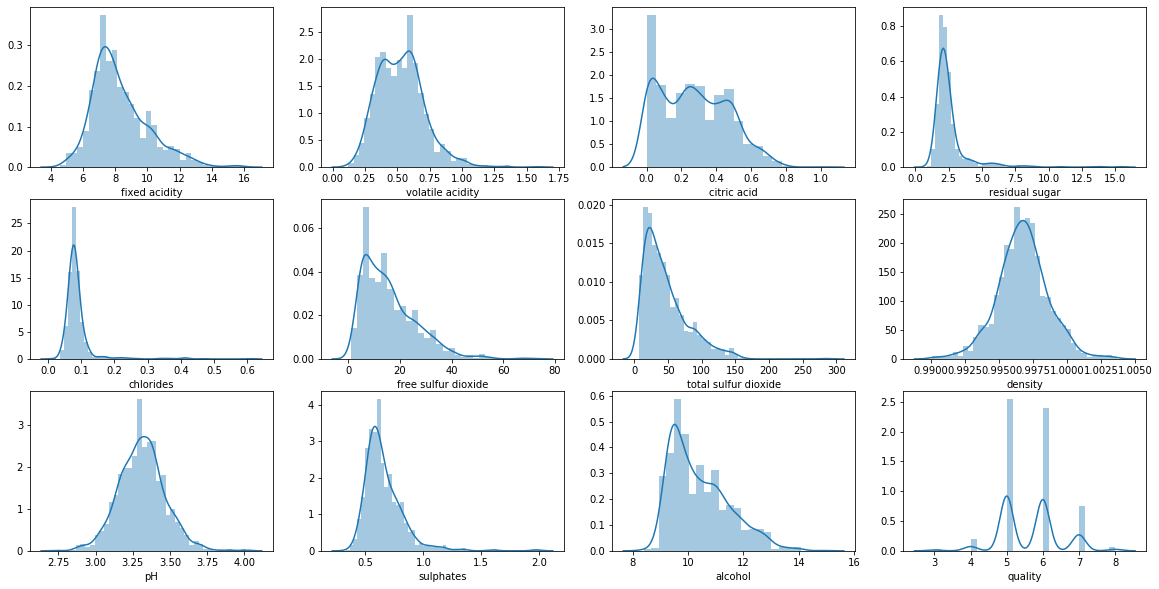

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    sns.distplot(data.iloc[:, i], ax=ax)
    ax.set_ylabel('')

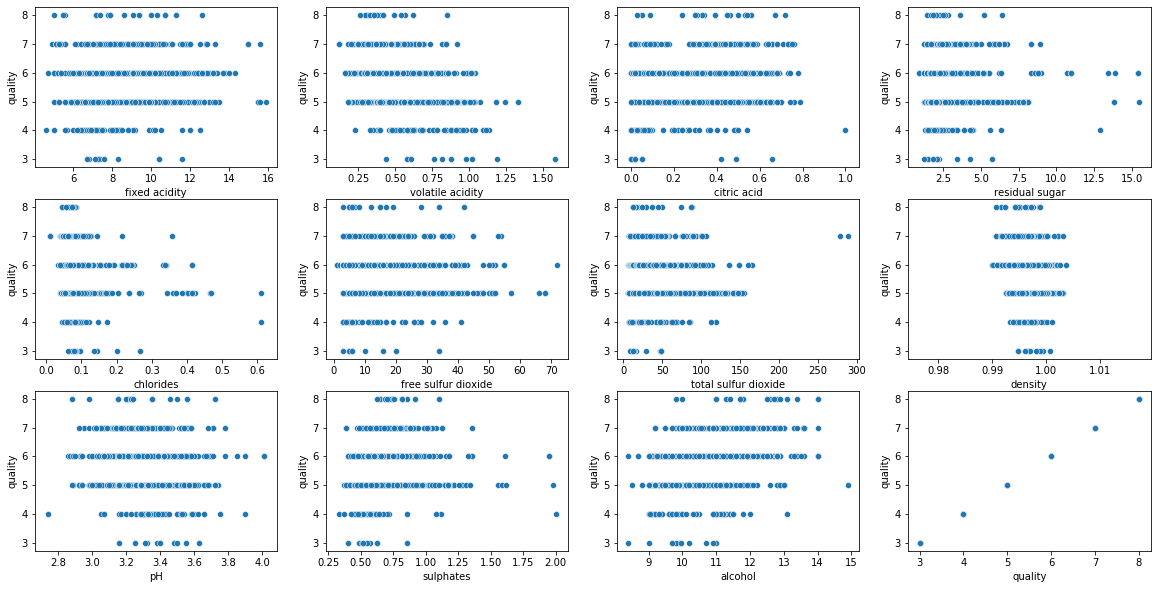

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    sns.scatterplot(x=data.columns[i], y='quality', data=data, ax=ax)

- Some features have high correlation with other features
- This is an imbalance dataset with normal quality (5 to 6) as majority class
- Features follow the skewed normal distribution.
- There is no linear relationship between features and target label

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
data.duplicated().sum()

240

In [14]:
unique_data = data.drop_duplicates()
unique_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [15]:
scaled_data = StandardScaler().fit_transform(unique_data.drop('quality', axis=1))
scaled_data[0]

array([-0.52443096,  0.93200015, -1.39325797, -0.46115707, -0.2456228 ,
       -0.46855352, -0.38404973,  0.58400336,  1.29187216, -0.57856134,
       -0.95437429])

In [36]:
X = unique_data.drop('quality', axis=1)
y = unique_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- Dataset contains 240 duplicated rows
- As there is no linear relationship, I consider non-linear distance-based models. Scaling is important in these models. I will use StandardScaler because the features are relatively normally distributed
- No new features needed as this is not a large dataset, I will use PCA to reduce the feature dimentions

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
pca_params = {'n_components': np.arange(3, 12)}

In [37]:
params = {'max_depth': np.arange(1, 11)}

# Full Dataset
DT_model = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, n_jobs=-1)
DT_model.fit(X_train, y_train)

# Scaled Dataset
DT_model_scaled = Pipeline([
    ('scale', StandardScaler()),
    ('estimator', GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, n_jobs=-1))
])
DT_model_scaled.fit(X_train, y_train)

# Reduced Dataset
DT_model_reduced = Pipeline([
    ('PCA', GridSearchCV(PCA(), param_grid=pca_params, cv=5, n_jobs=-1)),
    ('scale', StandardScaler()),
    ('estimator', GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, n_jobs=-1))
])
DT_model_reduced.fit(X_train, y_train);

In [38]:
params = {'C': np.logspace(-1, 4)}

# Full Dataset
SVC_model = GridSearchCV(SVC(), param_grid=params, cv=5, n_jobs=-1)
SVC_model.fit(X_train, y_train)

# Scaled Dataset
SVC_model_scaled = Pipeline([
    ('scale', StandardScaler()),
    ('estimator', GridSearchCV(SVC(), param_grid=params, cv=5, n_jobs=-1))
])
SVC_model_scaled.fit(X_train, y_train)

# Reduced Dataset
SVC_model_reduced = Pipeline([
    ('PCA', GridSearchCV(PCA(), param_grid=pca_params, cv=5, n_jobs=-1)),
    ('scale', StandardScaler()),
    ('estimator', GridSearchCV(SVC(), param_grid=params, cv=5, n_jobs=-1))
])
SVC_model_reduced.fit(X_train, y_train);

In [39]:
params = {'n_neighbors': np.arange(1, 11)}

# Full Dataset
KNN_model = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, n_jobs=-1)
KNN_model.fit(X_train, y_train)

# Scaled Dataset
KNN_model_scaled = Pipeline([
    ('scale', StandardScaler()),
    ('estimator', GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, n_jobs=-1))
])
KNN_model_scaled.fit(X_train, y_train)

# Reduced Dataset
KNN_model_reduced = Pipeline([
    ('PCA', GridSearchCV(PCA(), param_grid=pca_params, cv=5, n_jobs=-1)),
    ('scale', StandardScaler()),
    ('estimator', GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, n_jobs=-1))
])
KNN_model_reduced.fit(X_train, y_train);

In [40]:
pd.DataFrame({
    'Train Accuracy': [
        DT_model.score(X_train, y_train),
        SVC_model.score(X_train, y_train),
        KNN_model.score(X_train, y_train)
    ],
    'Test Accuracy': [
        DT_model.score(X_test, y_test),
        SVC_model.score(X_test, y_test),
        KNN_model.score(X_test, y_test)
    ],
    'Scaled Train Accuracy': [
        DT_model_scaled.score(X_train, y_train),
        SVC_model_scaled.score(X_train, y_train),
        KNN_model_scaled.score(X_train, y_train)
    ],
    'Scaled Test Accuracy': [
        DT_model_scaled.score(X_test, y_test),
        SVC_model_scaled.score(X_test, y_test),
        KNN_model_scaled.score(X_test, y_test)
    ],
    'Reduced Train Accuracy': [
        DT_model_reduced.score(X_train, y_train),
        SVC_model_reduced.score(X_train, y_train),
        KNN_model_reduced.score(X_train, y_train)
    ],
    'Reduced Test Accuracy': [
        DT_model_reduced.score(X_test, y_test),
        SVC_model_reduced.score(X_test, y_test),
        KNN_model_reduced.score(X_test, y_test)
    ]
}, index=['DT', 'SVC', 'KNN'])

,Train Accuracy,Test Accuracy,Scaled Train Accuracy,Scaled Test Accuracy,Reduced Train Accuracy,Reduced Test Accuracy
DT,0.656151,0.583333,0.656151,0.585784,0.589905,0.558824
SVC,0.651945,0.588235,0.642482,0.620098,0.655100,0.632353
KNN,0.581493,0.500000,0.610936,0.578431,0.638275,0.573529


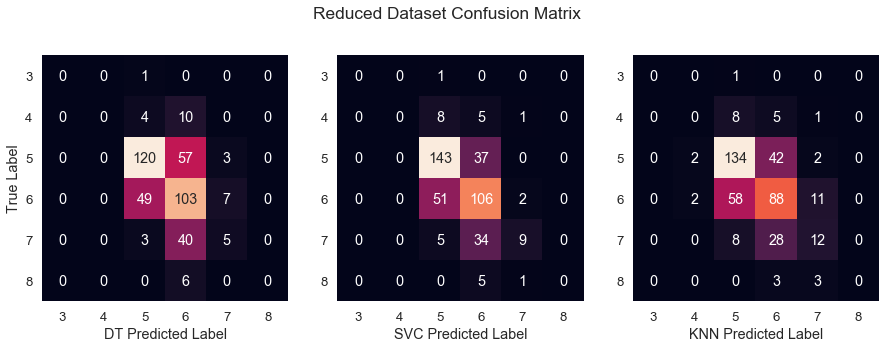

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

cm = confusion_matrix(y_test, DT_model_reduced.predict(X_test))
sns.heatmap(cm, square=True, fmt='d', annot=True, cbar=False, ax=ax1)
ax1.xaxis.set_ticklabels(np.unique(y))
ax1.yaxis.set_ticklabels(np.unique(y), rotation=0)
ax1.set_xlabel('DT Predicted Label')
ax1.set_ylabel('True Label')

cm = confusion_matrix(y_test, SVC_model_reduced.predict(X_test))
sns.heatmap(cm, square=True, fmt='d', annot=True, cbar=False, ax=ax2)
ax2.xaxis.set_ticklabels(np.unique(y))
ax2.yaxis.set_ticklabels(np.unique(y), rotation=0)
ax2.set_xlabel('SVC Predicted Label')

cm = confusion_matrix(y_test, KNN_model_reduced.predict(X_test))
sns.heatmap(cm, square=True, fmt='d', annot=True, cbar=False, ax=ax3)
ax3.xaxis.set_ticklabels(np.unique(y))
ax3.yaxis.set_ticklabels(np.unique(y), rotation=0)
ax3.set_xlabel('KNN Predicted Label')

plt.suptitle('Reduced Dataset Confusion Matrix')
plt.show()

In [42]:
print(classification_report(y_test, SVC_model_reduced.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.69      0.79      0.74       180
           6       0.57      0.67      0.61       159
           7       0.69      0.19      0.30        48
           8       0.00      0.00      0.00         6

    accuracy                           0.63       408
   macro avg       0.32      0.27      0.27       408
weighted avg       0.61      0.63      0.60       408



There is **no overfitting or underfitting problem** because the difference in accuracy between train and test set is not too big (**approximately 0.02**).

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

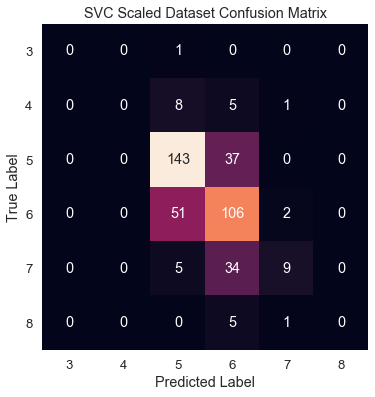

In [43]:
cm = confusion_matrix(y_test, SVC_model_reduced.predict(X_test))
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, square=True, fmt='d', annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y))
ax.yaxis.set_ticklabels(np.unique(y), rotation=0)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('SVC Scaled Dataset Confusion Matrix')
plt.show()

**SVC performs best because it has fewer misclassifications**. If the SVC misclassify, the difference between the true label and the predicted label is not that great. To improve the model performance we can do followong steps:
- **Dimension reduction**, because too many features in a small dataset could cause overfitting problem
- **Scaling**, because distance based model performs the best when features lie in the same scale